In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('lesson_3_data__1_.csv', encoding='Windows-1251')

In [3]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [4]:
user_df = df[['tc', 'art_sp']]

In [5]:
user_df = user_df.rename(columns={'tc': 'user_id', 'art_sp': 'brand_info'})

In [6]:
user_df

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [7]:
user_df['brand_name'] = user_df['brand_info'].apply(lambda x : x.split()[-1])

In [8]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [9]:
users_purchases = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': 'count'}) \
    .rename(columns={'brand_name': 'purchases'}) \
    .query('purchases >= 5')

In [10]:
users_unique_brands = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': pd.Series.nunique}) \
    .rename(columns={'brand_name': 'unique_brands'})

In [11]:
users_unique_brands

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2
...,...,...
11759,1408817589,2
11760,1408825059,1
11761,1408832719,1
11762,1408840919,1


In [12]:
users_purchases.head()

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [13]:
lovely_brand_purchases_df = user_df.groupby(['user_id', 'brand_name'], as_index=False) \
    .agg({'brand_info': 'count'}) \
    .sort_values(['user_id', 'brand_info'], ascending=[False, False]) \
    .groupby('user_id') \
    .head(1) \
    .rename(columns={'brand_name': 'lovely_brand', 'brand_info': 'lovely_brand_purchases'})

In [14]:
loyalty_df = users_purchases\
    .merge(users_unique_brands, on='user_id')\
    .merge(lovely_brand_purchases_df, on='user_id')

In [15]:
loyalty_df['loyalty_score'] = loyalty_df['lovely_brand_purchases'] / loyalty_df['purchases']

In [16]:
loyal_users = loyalty_df[loyalty_df.unique_brands == 1]

D:\Apps\Anaconda\envs\my_env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


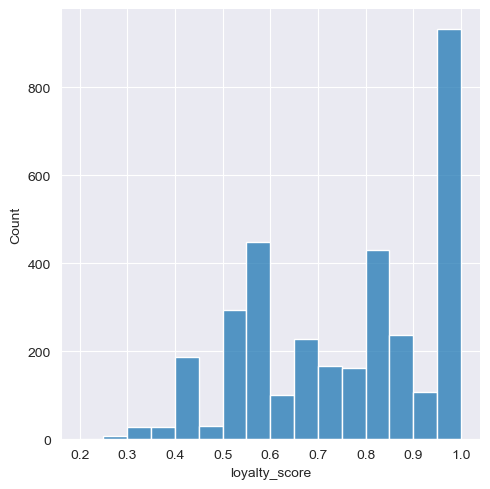

In [17]:
sns.displot(loyalty_df.loyalty_score)

In [18]:
loyalty_df.loyalty_score.median()

0.8

In [19]:
brands_loyalty = loyalty_df.groupby('lovely_brand', as_index=False) \
    .agg({'loyalty_score': 'median', 'user_id': 'count'})

<Axes: xlabel='lovely_brand', ylabel='user_id'>

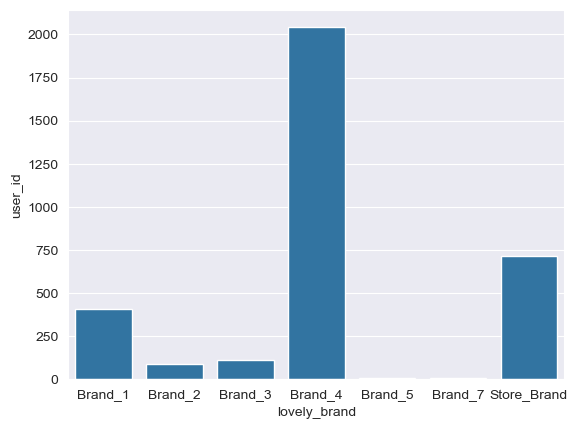

In [20]:
sns.barplot(x='lovely_brand', y='user_id', data=brands_loyalty)

### ДЗ

In [21]:
taxi = pd.read_csv('taxi_peru.csv', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [22]:
platforms = taxi.groupby('source').agg({'journey_id': 'count'}).rename(columns={'journey_id': 'drives'}).sort_values('drives', ascending=False)
platforms['percent'] = platforms.drives / platforms.drives.sum()
platforms

,drives,percent
source,,
iPhone,9741,0.423743
web,7631,0.331956
Android,4909,0.213546
iPad,571,0.024839
Wap,136,0.005916


<Axes: xlabel='source', ylabel='drives'>

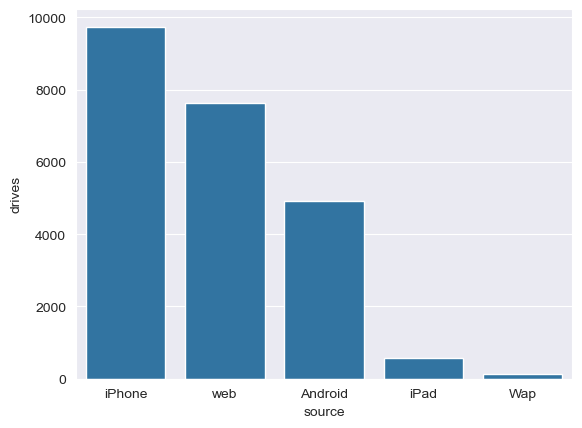

In [23]:
sns.barplot(x='source', y='drives', data=platforms)

<Axes: xlabel='count', ylabel='icon'>

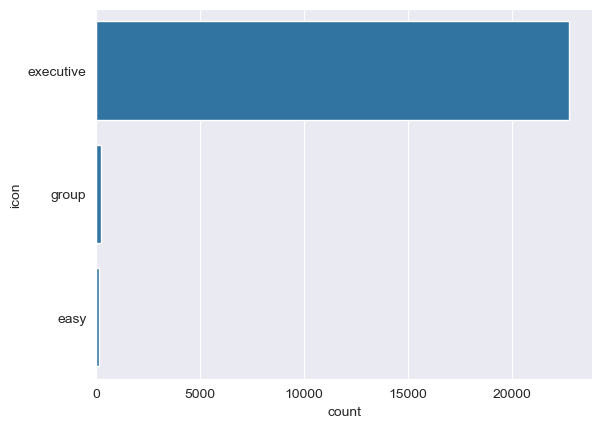

In [24]:
sns.countplot(taxi.icon)

<Axes: xlabel='source', ylabel='count'>

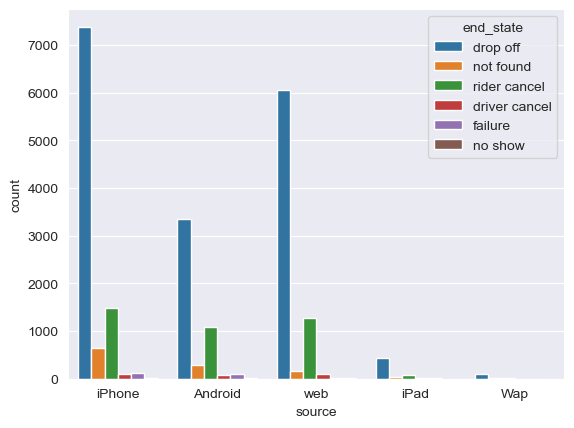

In [25]:
sns.countplot(data=taxi, x='source', hue='end_state')

In [57]:
driver_score_counts = taxi.groupby('driver_score', as_index=False).agg({'journey_id': 'count'}).rename(columns={'journey_id': 'percentage'}).sort_values('driver_score')
driver_score_counts['percentage'] = driver_score_counts['percentage'].apply(lambda x: x / driver_score_counts['percentage'].sum()).mul(100).round(2)
driver_score_counts

,driver_score,percentage
0,0.0,14.30
1,1.0,1.23
2,2.0,0.81
3,3.0,2.97
4,4.0,21.88
5,5.0,58.81


<Axes: xlabel='driver_score', ylabel='percentage'>

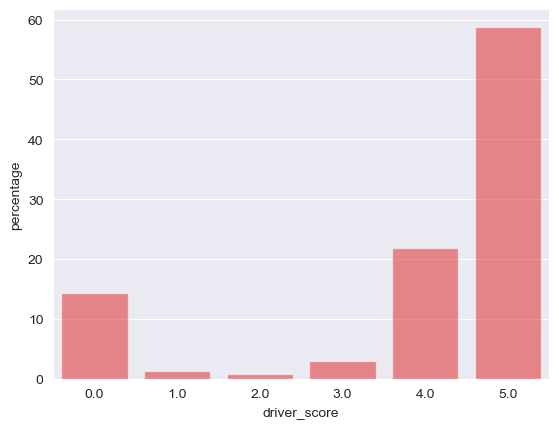

In [72]:
sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='red', alpha=0.5)

In [55]:
rider_score_counts = taxi.groupby('rider_score', as_index=False).agg({'journey_id': 'count'}).rename(columns={'journey_id': 'percentage'}).sort_values('rider_score')
rider_score_counts['percentage'] = rider_score_counts['percentage'].apply(lambda x: x / rider_score_counts['percentage'].sum()).mul(100).round(2)
rider_score_counts

,rider_score,percentage
0,0.0,2.29
1,1.0,0.21
2,2.0,0.19
3,3.0,1.38
4,4.0,8.83
5,5.0,87.10


<Axes: xlabel='rider_score', ylabel='percentage'>

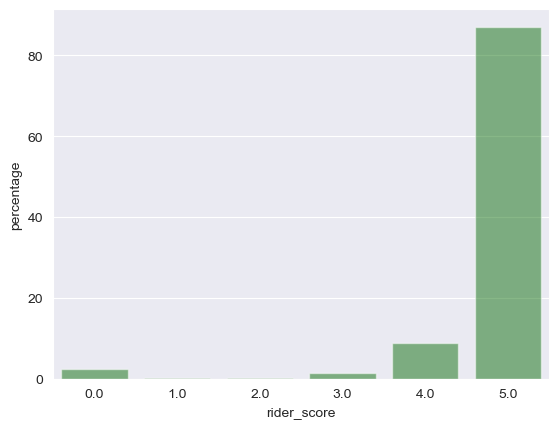

In [73]:
sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='green', alpha=0.5)